<a href="https://colab.research.google.com/github/jjyothika15/IBM_Internship/blob/main/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn nltk


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
import pandas as pd

fake_path = '/content/drive/MyDrive/Capstone/Fake.csv'
real_path = '/content/drive/MyDrive/Capstone/True.csv'

fake = pd.read_csv(fake_path)
real = pd.read_csv(real_path)

# Add labels
fake['label'] = 'FAKE'
real['label'] = 'REAL'

# Combine datasets
df = pd.concat([fake, real])
df = df.sample(frac=1).reset_index(drop=True)  # shuffle

# Use only relevant columns
df = df[['text', 'label']]
df.head()


,text,label
0,OTTAWA (Reuters) - The U.S. administration is ...,REAL
1,ISTANBUL (Reuters) - Turkish President Tayyip ...,REAL
2,Republican congressional candidates have been ...,FAKE
3,WASHINGTON/JERUSALEM (Reuters) - President Don...,REAL
4,"The Washington Post, after being repeatedly dr...",FAKE


In [8]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)         # Remove punctuation
    text = re.sub(r'\s+', ' ', text)        # Remove extra spaces
    return text

df['text'] = df['text'].apply(clean_text)


In [9]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)


In [11]:
model = PassiveAggressiveClassifier(max_iter=50)
model.fit(tfidf_train, y_train)


PassiveAggressiveClassifier(max_iter=50)

Accuracy: 99.37%


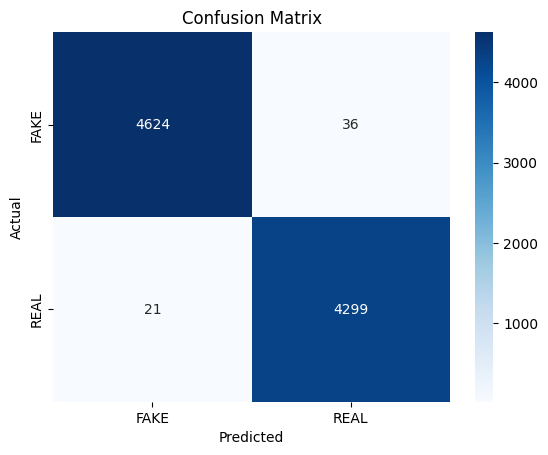

In [12]:
y_pred = model.predict(tfidf_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [13]:
def predict_news(news_text):
    cleaned = clean_text(news_text)
    vectorized = tfidf.transform([cleaned])
    prediction = model.predict(vectorized)[0]
    return prediction

# Example
news = "The president just signed a new healthcare bill into law."
print("Prediction:", predict_news(news))


Prediction: FAKE
